# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

Тариф «Смарт»:
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

### Описание данных:

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица revenue (информация об ежемесячной выручки с каждого пользователя): 
- user_id — идентификатор пользователя	
- month — месяц
- internet_mb — объем интернет-трафика в мегабайтах	
- internet_gb —	бъем интернет-трафика в гигабайтах
- messages_count —	количество сообщений
- tariff — тариф	
- calls_count —	количество звонков
- calls_sum — продолжительность звонков	
- calls_min — продолжительность звонков, округленная до целых чисел в большую сторону (в соотвествии с тарифом)	
- revenue — выручка

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание тарифов</a></span></li><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных:</a></span></li></ul></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Подгтовка-данных" data-toc-modified-id="Подгтовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подгтовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза:-средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Гипотеза:-средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Гипотеза:-средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Гипотеза:-средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st
import math

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.shape

(202607, 4)

In [4]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
internet.shape

(149396, 5)

In [6]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [7]:
messages.shape

(123036, 3)

In [8]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [9]:
tariffs.shape

(2, 8)

In [10]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users.shape

(500, 8)

In [12]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


В каждой таблице, кроме `tariffs` присутствует одинаковый стобец `user_id` с идентификатором пользователя. По нему можем объединить таблицы. Наименование столбцов записано верно (кроме ` Unnamed: 0`).

## Подгтовка данных

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 202607 entries, 0 to 202606

Data columns (total 4 columns):

 #   Column     Non-Null Count   Dtype  

---  ------     --------------   -----  

 0   id         202607 non-null  object 

 1   call_date  202607 non-null  object 

 2   duration   202607 non-null  float64

 3   user_id    202607 non-null  int64  

dtypes: float64(1), int64(1), object(2)

memory usage: 6.2+ MB


In [14]:
calls.duplicated().sum()

0

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 149396 entries, 0 to 149395

Data columns (total 5 columns):

 #   Column        Non-Null Count   Dtype  

---  ------        --------------   -----  

 0   Unnamed: 0    149396 non-null  int64  

 1   id            149396 non-null  object 

 2   mb_used       149396 non-null  float64

 3   session_date  149396 non-null  object 

 4   user_id       149396 non-null  int64  

dtypes: float64(1), int64(2), object(2)

memory usage: 5.7+ MB


In [16]:
internet.duplicated().sum()

0

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 123036 entries, 0 to 123035

Data columns (total 3 columns):

 #   Column        Non-Null Count   Dtype 

---  ------        --------------   ----- 

 0   id            123036 non-null  object

 1   message_date  123036 non-null  object

 2   user_id       123036 non-null  int64 

dtypes: int64(1), object(2)

memory usage: 2.8+ MB


In [18]:
messages.duplicated().sum()

0

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 500 entries, 0 to 499

Data columns (total 8 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   user_id     500 non-null    int64 

 1   age         500 non-null    int64 

 2   churn_date  38 non-null     object

 3   city        500 non-null    object

 4   first_name  500 non-null    object

 5   last_name   500 non-null    object

 6   reg_date    500 non-null    object

 7   tariff      500 non-null    object

dtypes: int64(2), object(6)

memory usage: 31.4+ KB


In [20]:
users.duplicated().sum()

0

Пропусков и дубликатов в таблицах нет (пропуски в стобце `churn_date` означают, что пользователь продолжает пользоваться тарифом).

Объединили таблицы. Использовали метод `outer`, чтобы объединить все значения. Образовались пропуски ввиду отсутвия схожих данных в таблицах.

У некоторых столбцов некорректен тип данных.

In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = calls['duration'].astype('float32')
calls['user_id'] = calls['user_id'].astype('int16')
users['user_id'] = users['user_id'].astype('int16')
internet['user_id'] = internet['user_id'].astype('int16')
messages['user_id'] = messages['user_id'].astype('int16')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

Столбцы `age` и `churn_date` преобразовать не удалось, так как в них содержаться пропуски. Если в дальнейшем анализе они понадобиться, пропуски удалим или заполним значениями.

Столбец ` Unnamed: 0` содержит порядковые индексы строки, его стоит удалить.

In [23]:
internet.drop('Unnamed: 0', inplace=True, axis=1)

In [24]:
calls['call_month'] = calls['call_date'].dt.month
messages['messages_month'] = messages['message_date'].dt.month
internet['session_month'] = internet['session_date'].dt.month

In [25]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls

,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [26]:
id_calls = calls.pivot_table(index=['user_id', 'call_month'], values='duration', aggfunc=['count', 'sum'])
id_calls.columns = ['calls_count', 'calls_sum']
id_calls.reset_index(inplace = True)
id_calls = id_calls.rename (columns = {'call_month': 'month'})
id_calls

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


Создали таблицу с суммой минут звонков. Столбец `calls_min` - минуты звоков в месяц, округленные в большую сторону, в соотвествии с правилами тарифов.

In [27]:
id_messages = messages.pivot_table(index=['user_id', 'messages_month'], values='message_date', aggfunc='count')
id_messages.columns = ['messages_count']
id_messages.reset_index(inplace = True)
id_messages = id_messages.rename (columns = {'messages_month': 'month'})
id_messages

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Таблица количества сообщений каждого пользователя по месяцам.

In [28]:
id_internet = internet.pivot_table(index=['user_id', 'session_month'], values=['mb_used'], aggfunc='sum')
id_internet.columns = ['internet_mb']
id_internet['internet_gb'] = np.ceil(id_internet['internet_mb']/1024).astype('int32')
id_internet.reset_index(inplace = True)
id_internet = id_internet.rename (columns = {'session_month': 'month'})
id_internet

,user_id,month,internet_mb,internet_gb
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


Таблица отражает использованный интернет-трафик каждого пользователя в месяц. Добавили столбец `internet_gb` с данными интерент-трафика по месяцам в Гигабайтах (округлили в большую сторону, в соотвествии с правилами тарифов).

In [30]:
revenue = id_internet.merge(id_messages, on = ['user_id', 'month'], how='outer')
revenue = revenue.merge(id_calls, on = ['user_id', 'month'], how="outer")
revenue = revenue.merge(users[['user_id', 'city', 'tariff']], on = ['user_id'], how="outer")
#revenue.drop(['age', 'first_name', 'churn_date', 'last_name', 'reg_date'], inplace=True, axis=1)
revenue

,user_id,month,internet_mb,internet_gb,messages_count,calls_count,calls_sum,city,tariff
0,1000,5.0,2253.49,3.0,22.0,22.0,159.0,Краснодар,ultra
1,1000,6.0,23233.77,23.0,60.0,43.0,172.0,Краснодар,ultra
2,1000,7.0,14003.64,14.0,75.0,47.0,340.0,Краснодар,ultra
3,1000,8.0,14055.93,14.0,81.0,52.0,408.0,Краснодар,ultra
4,1000,9.0,14568.91,15.0,57.0,58.0,466.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,NaN,35.0,40.0,315.0,Курган,ultra
3212,1273,11.0,NaN,NaN,29.0,45.0,272.0,Курган,ultra
3213,1273,12.0,NaN,NaN,39.0,41.0,260.0,Курган,ultra
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,Волжский,ultra


In [31]:
len(revenue['user_id'].unique())

500

In [32]:
revenue['internet_gb'].sum()

55599.0

In [33]:
id_internet['internet_gb'].sum()

55599

In [34]:
revenue['messages_count'].sum()

123036.0

In [35]:
id_messages['messages_count'].sum()

123036

In [36]:
revenue['calls_sum'].sum()

1450301.0

In [37]:
id_calls['calls_sum'].sum()

1450301

Создали таблицу, отражающую продолжительность звонков, количество сообщений и интернет-трафика каждого пользователя по месяцам.

In [38]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 3216 entries, 0 to 3215

Data columns (total 9 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   user_id         3216 non-null   int64  

 1   month           3214 non-null   float64

 2   internet_mb     3203 non-null   float64

 3   internet_gb     3203 non-null   float64

 4   messages_count  2717 non-null   float64

 5   calls_count     3174 non-null   float64

 6   calls_sum       3174 non-null   float64

 7   city            3216 non-null   object 

 8   tariff          3216 non-null   object 

dtypes: float64(6), int64(1), object(2)

memory usage: 251.2+ KB


В столбце `messages_count` остались пропуски. Их стоит заполнить, чтобы выполнить дальнейший анализ (медианным значением для корректности данных).

In [39]:
revenue = revenue.fillna(0)

In [40]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [41]:
def revenue_sum(row):
    tariff = row['tariff']
    calls = row['calls_sum']
    messages = row['messages_count']
    internet = row['internet_gb']
    sum_calls = calls - int(tariffs[tariffs['tariff_name'] == tariff]['minutes_included'])
    sum_internet = internet - int(tariffs[tariffs['tariff_name'] == tariff]['mb_per_month_included'])/1024
    sum_messages = messages - int(tariffs[tariffs['tariff_name'] == tariff]['messages_included'])
    if sum_calls < 0:
        sum_calls = 0
    if sum_internet < 0:
        sum_internet = 0
    if sum_messages < 0:
        sum_messages = 0
    return (
        sum_calls*int(tariffs[tariffs['tariff_name'] == tariff]['rub_per_minute'])
        +sum_internet*int(tariffs[tariffs['tariff_name'] == tariff]['rub_per_gb'])
        +sum_messages*int(tariffs[tariffs['tariff_name'] == tariff]['rub_per_message'])
        +int(tariffs[tariffs['tariff_name'] == tariff]['rub_monthly_fee'])
    )
revenue['revenue'] = revenue.apply(revenue_sum, axis=1)

In [42]:
revenue.head(10)

,user_id,month,internet_mb,internet_gb,messages_count,calls_count,calls_sum,city,tariff,revenue
0,1000,5.0,2253.49,3.0,22.0,22.0,159.0,Краснодар,ultra,1950.0
1,1000,6.0,23233.77,23.0,60.0,43.0,172.0,Краснодар,ultra,1950.0
2,1000,7.0,14003.64,14.0,75.0,47.0,340.0,Краснодар,ultra,1950.0
3,1000,8.0,14055.93,14.0,81.0,52.0,408.0,Краснодар,ultra,1950.0
4,1000,9.0,14568.91,15.0,57.0,58.0,466.0,Краснодар,ultra,1950.0
5,1000,10.0,14702.49,15.0,73.0,57.0,350.0,Краснодар,ultra,1950.0
6,1000,11.0,14756.47,15.0,58.0,43.0,338.0,Краснодар,ultra,1950.0
7,1000,12.0,9817.61,10.0,70.0,46.0,333.0,Краснодар,ultra,1950.0
8,1001,11.0,18429.34,18.0,0.0,59.0,430.0,Москва,smart,1150.0
9,1001,12.0,14036.66,14.0,0.0,63.0,414.0,Москва,smart,550.0


Вывод:

Осуществлена проверка на пропуски и дубликаты, данные объеденены в одну таблицу, преведены к нужным типам, удален столбец, не отражающий полезной информации. Добавлена колонка, отражающая ежемесячную выручку с каждого пользователя.
Данные подготовлены к анализу.

## Анализ данных

In [43]:
mean_month = revenue.pivot_table(index=['tariff', 'month'], values=['internet_mb', 'internet_gb', 'messages_count', 'calls_sum', 'revenue'], aggfunc='mean')
mean = mean_month.pivot_table(index=['tariff'], values=['internet_mb', 'internet_gb', 'messages_count', 'calls_sum', 'revenue'], aggfunc='mean')
mean.loc['difference'] = mean.loc['ultra'] - mean.loc['smart']
mean
# Сначало нашли средние значения по тарифам в каждом месяце, затем среднее средних ежемесячных значений.

,calls_sum,internet_gb,internet_mb,messages_count,revenue
tariff,,,,,
smart,357.009691,14.029595,13900.067293,28.996810,1131.468699
ultra,457.785517,16.854403,16805.362681,40.352292,2039.476483
difference,100.775826,2.824808,2905.295388,11.355482,908.007784


In [44]:
smart = revenue.query('tariff == "smart"')
ultra = revenue.query('tariff == "ultra"')

Создали таблицы с средней ежемесячной выручкой для каждого тарифа.

In [45]:
error_smart = 1.96*np.std(smart['revenue'])/np.sqrt(len(smart))
error_smart

33.95911524738016

Доверительный интервал для средней ежемесячной выручки с тарифа "Смарт" при доверительном уровне 95%.

In [46]:
error_ultra = 1.96*np.std(ultra['revenue'])/np.sqrt(len(ultra))
error_ultra

23.458655054874747

Доверительный интервал для средней ежемесячной выручки с тарифа "Ультра" при доверительном уровне 95%.

Таблица `mean` отражает ежемесячные средние значения по расходование минут тарифа, интернет-трафика и количества сообщений по разным тарифам месяц, а также разницу показателей тарифаов Ultra и Smart. 

Как видим, среднее необходимое количество минут разговора, интернет-трафика и количества сообщений пользователям тарифа Ultra превышает показатели для пользователей тарифа Smart. 

Средня ежемесячная выручка с тарифа "Смарт" составляет 1099.32 руб. (или от 1066.51 руб. до 1132.43 руб.)

Средня ежемесячная выручка с тарифа "Ультра" составляет 2039.48 руб. (или от 2016.02 руб. до 2062.94 руб.)

Кроме того, средняя ежемесячная выручка сотового оператора с одного пользователя тарифа Ultra больше на 897.14 руб.

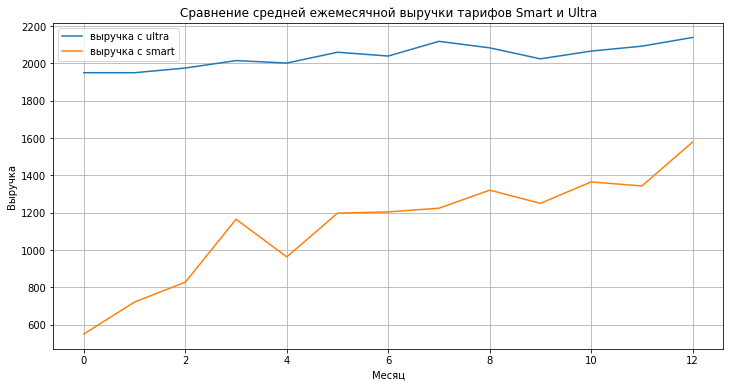

In [47]:
a = revenue.pivot_table(index=['tariff', 'month'], values='revenue', aggfunc='mean').reset_index()
b = revenue.pivot_table(index=['tariff', 'month'], values='user_id', aggfunc='count').reset_index()
smart_plot = a.query('tariff == "smart"')
ultra_plot = a.query('tariff == "ultra"')
user_smart = b.query('tariff == "smart"')
#user_ultra = b.query('tariff == "ultra"')
plt.figure(figsize=(12, 6))
plt.title('Сравнение средней ежемесячной выручки тарифов Smart и Ultra')
plt.plot(ultra_plot['month'], ultra_plot['revenue'], label="выручка с ultra")
plt.plot(smart_plot['month'], smart_plot['revenue'], label="выручка с smart")
#plt.plot(user_ultra['month'], user_ultra['user_id'], label="количество пользователей ultra")
#plt.plot(user_smart['month'], user_smart['user_id'], label="количество пользователей smart")
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend()
plt.grid(True)

Можем заметить, что средняя ежемесячная выручка сотового оператора с тарифа Smart существенно увеличивается, в отличии от выручки с тарифа Ultra. Однако это объясняется сильным приростом пользователей тарифа Smart, ввиду чего разрыв среденей ежемесячной выручки по тарифам сокращается.

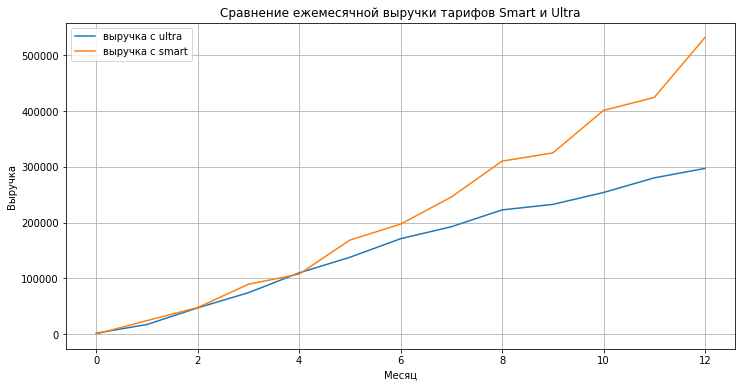

In [48]:
revenue_user = revenue.groupby(['tariff', 'month']).agg({'revenue':['mean', 'sum']}).reset_index()
c = revenue.groupby(['tariff', 'month']).agg({'revenue':['mean', 'sum']}).reset_index()
c.columns = ['tariff', 'month', 'revenue_mean', 'revenue_sum']
smart_c = c.query('tariff == "smart"')
ultra_c = c.query('tariff == "ultra"')
plt.figure(figsize=(12, 6))
plt.title('Сравнение ежемесячной выручки тарифов Smart и Ultra')
plt.plot(ultra_c['month'], ultra_c['revenue_sum'], label="выручка с ultra")
plt.plot(smart_c['month'], smart_c['revenue_sum'], label="выручка с smart")
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend()
plt.grid(True)

При большей средней ежемесячной выруски с тарифа "Ultra", общая ежемесячная выручка с тарифа "Smart" заметно больше. Число пользователей тарифа "Smart" превышает число пользователей другого тарифа (как и темп роста пользователей), чем можно объяснить такую разницу.

In [49]:
revenue.pivot_table(
    index = 'tariff',
    values = ['calls_sum', 'messages_count', 'internet_mb', 'revenue'],
    aggfunc= ['mean', 'var','std'])

mean                                                      var  \
         calls_sum   internet_mb messages_count      revenue      calls_sum   
tariff                                                                        
smart   417.747534  16201.118655      33.369058  1289.641704   36281.393836   
ultra   526.089249  19449.059970      49.313387  2070.030426  101052.493549   

                                                           std                \
         internet_mb messages_count        revenue   calls_sum   internet_mb   
tariff                                                                         
smart   3.456484e+07     796.955256  669730.763895  190.476754   5879.187315   
ultra   1.020321e+08    2285.417425  141387.714809  317.887549  10101.095459   

                                   
       messages_count     revenue  
tariff                             
smart       28.230396  818.370799  
ultra       47.806040  376.015578

Дисперсия и стандартное отклонение по таким показателя, как использование интрнет-трафика, количество сообщений, звонков и израсходованных минут у пользователей тарифа Ultra существенно выше. Данный факт свидетельствует о большем разбросе анализируемых показателей вокруг среднего значения.

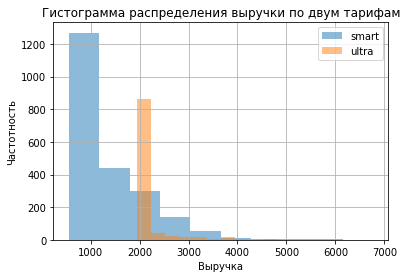

In [50]:
smart['revenue'].hist(alpha=0.5)
ultra['revenue'].hist(alpha=0.5)
plt.title('Гистограмма распределения выручки по двум тарифам')
plt.xlabel('Выручка')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

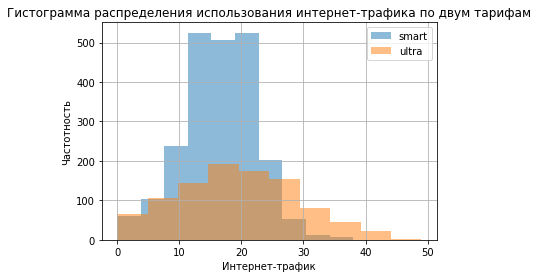

In [51]:
smart['internet_gb'].hist(alpha=0.5)
ultra['internet_gb'].hist(alpha=0.5)
plt.title('Гистограмма распределения использования интернет-трафика по двум тарифам')
plt.xlabel('Интернет-трафик')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

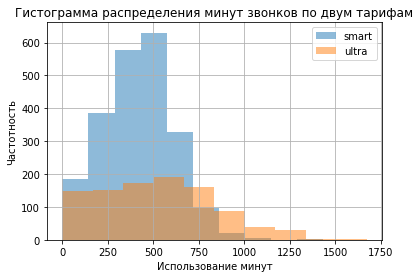

In [52]:
smart['calls_sum'].hist(alpha=0.5)
ultra['calls_sum'].hist(alpha=0.5)
plt.title('Гистограмма распределения минут звонков по двум тарифам')
plt.xlabel('Использование минут')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

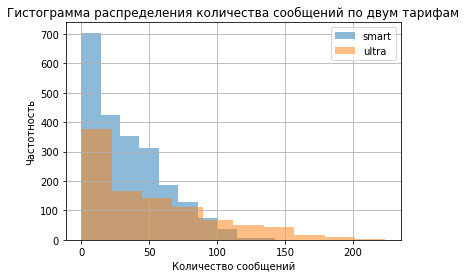

In [53]:
smart['messages_count'].hist(alpha=0.5)
ultra['messages_count'].hist(alpha=0.5)
plt.title('Гистограмма распределения количества сообщений по двум тарифам')
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

Гисторграммы распределения изучаемых показателей по каждому тарифу не имеют нормального распределения. Можем отметить, что показатели использование интернет-трафика тарифа Smart стремятся к нормальному распределению, в отличии от данного показателя тарифа Ultra. Помимо этого, частота показателя использованных минут разговора тарифа Ultra имеет большее смещение влево (асимметрия влево), чем у тарифа Smart, что свидетельствует о больщем количестве данного показателя, стремящихся к нулю.


Среднее ежемесячное количество звонков, сообщений, использованных минут разговора и интернет-трафика у пользователей тарифа Ultra существенно выше, чем у пользователей тарифа Smart. Однако разброс значений анализируемых показателей вокруг среднего  также выше, что говорит о наличии пользователей тарифа Ultra, которые используют услуги сотового оператора как более активно, так и менее активно, чем среднестатистический пользователь.

Кроме того, выручка сотового оператора с тарифа Ultra существенно выше, чем с тарифа Smart. Однако количество пользователей тарифа Smart растет быстрее, чем пользователей тарифа Ultra, и разница в средней ежемесячной выручке сокращается.

## Проверка гипотез

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» равны

Альтернативная гипотеза: средняя выручка пользователей тарифа "Ультра" не равна выручки пользователей тарифа "Смарт"

В задании необходимо выяснить отличаются ли среднии выручки представленных тарифов. Соотвесвенно, нулевая гипотеза гласит, что равны. 
Поскольку мы проводим двусторонний тест, то альтернативная гипотеза является обратной нулевой.

In [54]:
result = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var = False)
alpha = 0.01
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print("Нулевая гипотеза маловероятна")
else:
    print("Нулевая гипотеза вероятна") 

p-значение: 1.927011394420941e-250

Нулевая гипотеза маловероятна


In [55]:
print('Средняя выручка с тарифа "Смарт"', smart['revenue'].mean())
print('Средняя выручка с тарифа "Ультра"', ultra['revenue'].mean())


Средняя выручка с тарифа "Смарт" 1289.6417040358745

Средняя выручка с тарифа "Ультра" 2070.030425963489


Для проверки гипотезы использовали критический уровень статистической значимости, равный 0.01. Такое значение принято для более точного установления подтверждения гипотезы.

По результатм теста данные показывают очень маловероятные результаты, что нулевая гипотеза верна, поэтому мы принимаем альтернативную гипотезу, соотвесвенно средние выручки пользователей тарифов «Ультра» и «Смарт» не равны.

Как было отмечено ранее, средняя выручка с тарифа "Ультра" превышаеет среднюю выручку с тарифа "Смарт".

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручки пользователей из других регионов

Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна выручки пользователей из других регионов

Необходимо установить есть ли отличия выручки от пользователей в Москве и от других регионов. 

In [56]:
moscow = revenue.query('city == "Москва"')
region = revenue.query('city != "Москва"')

In [57]:
res = st.ttest_ind(moscow['revenue'], region['revenue'], equal_var = False)
alpha = 0.01
print('p-значение:', res.pvalue)
if res.pvalue < alpha:
    print("Нулевая гипотеза маловероятна")
else:
    print("Нулевая гипотеза вероятна") 

p-значение: 0.5216952110000278

Нулевая гипотеза вероятна


In [58]:
print('Средняя выручка с  Москвы', moscow['revenue'].mean())
print('Средняя выручка с тдругих регионов', region['revenue'].mean())

Средняя выручка с  Москвы 1546.7135842880523

Средняя выручка с тдругих регионов 1524.7251439539348


Как и для проверки первой гипотезы использовали критический уровень статистической значимости, равный 0.01. 

Нулевая гипотеза оказалась достаточно вероятной, поэтому можем предположить, что средняя выручка пользователей из Москвы равна выручки из других регионов.

## Вывод

Проведенный анализ свидетельствует о том, что за 2018 год средняя ежемесячна выручка сотового оператора "Мегалайн" с тарифа "Ультра" превышает выручку с тарифа "Смарт". 

Стоит отметить, что общая ежемесячная выручка с тарифа "Смарт" существенно выше, чем выручка с тарифа "Ультра". Однако цель анализа - установить, с какого тарифа больше выручка на одного пользователя, чтобы скорректировать рекламный бюджет. Выручка с одного пользователя выше с тарифа "Ультра".

По результатам анализа средняя выручка с тарифа "Ультра" составила 2070.03 руб., средняя выручка с тарифа "Смарт" - 1289.64 руб.

При этом, средняя выручка пользователей из Москвы больше, чем из других регионов.